## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

**Loading Dataset**

In [2]:
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/teleCust1000t.csv'
df = pd.read_csv(url)
df.sample(5)

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
781,1,4,37,1,8,25.0,1,1,0.0,1,5,1
947,3,66,50,1,2,333.0,5,24,0.0,0,2,2
366,1,47,35,1,13,70.0,4,9,0.0,1,2,4
307,2,12,64,0,13,9.0,2,6,1.0,1,1,3
196,2,22,43,0,4,114.0,2,19,0.0,0,1,1


In [3]:
df.custcat.value_counts()

custcat
3    281
1    266
4    236
2    217
Name: count, dtype: int64

It can thus be seen that the data set is mostly balanced between the different classes and requires no special means of accounting for class bias.

**Visualizing correlation datas**

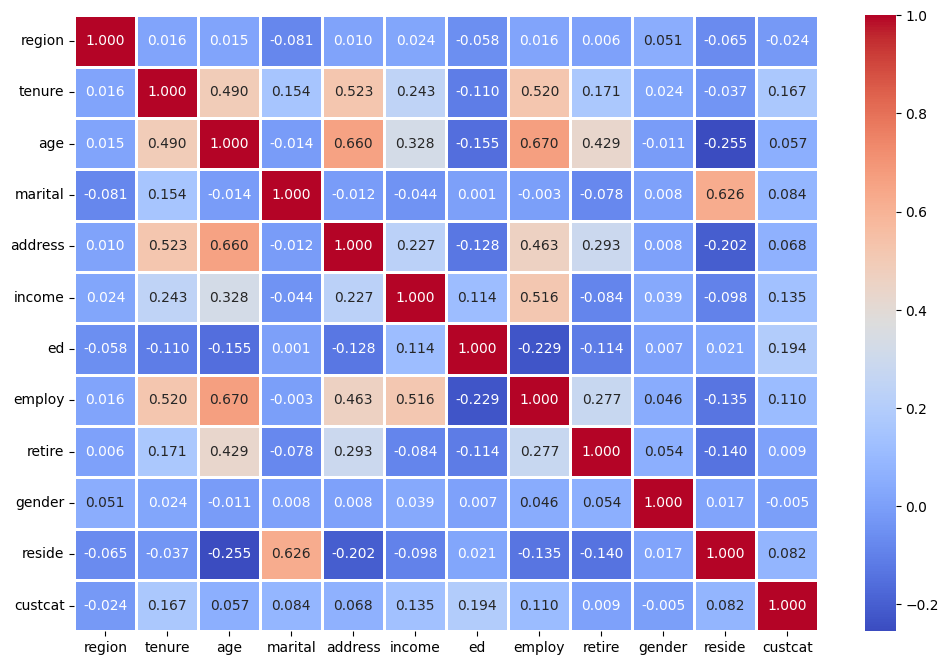

In [14]:
correlation_values = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_values, annot=True, cmap='coolwarm', fmt='.3f', linewidths=1)
plt.show()

In [12]:
correlation_data = abs(df.corr())['custcat'].drop('custcat').sort_values(ascending=False)
correlation_data

ed         0.193864
tenure     0.166691
income     0.134525
employ     0.110011
marital    0.083836
reside     0.082022
address    0.067913
age        0.056909
region     0.023771
retire     0.008908
gender     0.004966
Name: custcat, dtype: float64

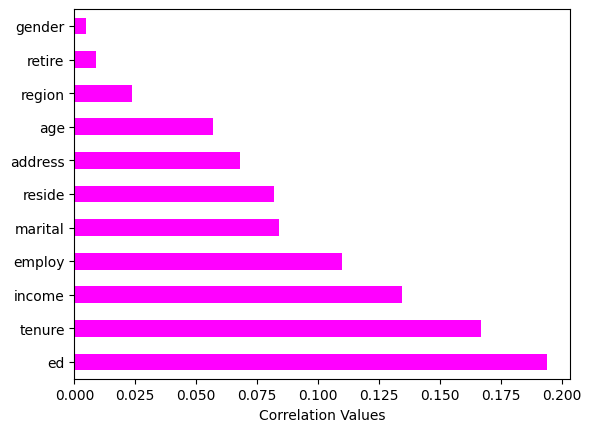

In [15]:
# Plotting above result in bar graph
correlation_data.plot(kind='barh', color='magenta')
plt.xlabel('Correlation Values')
plt.show()

**Separate X and y features**

In [16]:
X = df.drop('custcat', axis=1)
y = df.custcat

**Normalize data**

Data normalization is important for the KNN model.

KNN makes predictions based on the distance between data points (samples), i.e. for a given test point, the algorithm finds the k-nearest neighbors by measuring the distance between the test point and other data points in the dataset. By normalizing / standardizing the data, you ensure that all features contribute equally to the distance calculation. Since normalization scales each feature to have zero mean and unit variance, it puts all features on the same scale (with no feature dominating due to its larger range).

This helps KNN make better decisions based on the actual relationships between features, not just on the magnitude of their values.

In [17]:
X_norm = StandardScaler().fit_transform(X)

**Splitting train/test datasets**

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.2, random_state=42)

**Model Building**

First we can start with smaller value of `k` i.e. `n_neighbors` and gradually check for other values. Best way to do is using cross_validation using following script
from sklearn.model_selection import cross_val_score

for k in range(1, 21):<br>
    model = KNeighborsClassifier(n_neighbors=k)<br>
    scores = cross_val_score(model, X, y, cv=5)<br>
    print(f'K={k}, Accuracy={scores.mean():.3f}')'

In [19]:
k=3
model=KNeighborsClassifier(n_neighbors=k)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

**Calculating accuracy**

In [20]:
accuracy = np.round(100*accuracy_score(y_test, y_pred), 3)
print(f'Accuracy Score: {accuracy}%')

Accuracy Score: 36.5%


**Value of K**<br>
In KNN, value of K clearly affect the model score and best value of K needs to be determined. Let's try to find best value of K

In [60]:
def finding_k(k):
    acc_list = []
    for i in range(1, k+1):
        model_k = KNeighborsClassifier(n_neighbors=i).fit(X_train, y_train)
        y_pred_k = model_k.predict(X_test)
        accuracy = np.round(100*accuracy_score(y_test, y_pred_k), 3)
        acc_list.append(accuracy)
        print(f'K = {i}, Accuracy = {accuracy}%')
    best_k = np.argmax(acc_list)+1
    best_acc = acc_list[best_k-1]
    print(f'Best K: {best_k} \nBest Accuracy: {best_acc}')
finding_k(30)

K = 1, Accuracy = 29.0%
K = 2, Accuracy = 34.0%
K = 3, Accuracy = 36.5%
K = 4, Accuracy = 32.5%
K = 5, Accuracy = 33.0%
K = 6, Accuracy = 33.0%
K = 7, Accuracy = 33.0%
K = 8, Accuracy = 33.5%
K = 9, Accuracy = 33.0%
K = 10, Accuracy = 35.0%
K = 11, Accuracy = 35.5%
K = 12, Accuracy = 34.5%
K = 13, Accuracy = 34.5%
K = 14, Accuracy = 37.5%
K = 15, Accuracy = 36.0%
K = 16, Accuracy = 35.5%
K = 17, Accuracy = 35.0%
K = 18, Accuracy = 39.0%
K = 19, Accuracy = 37.0%
K = 20, Accuracy = 35.5%
K = 21, Accuracy = 34.0%
K = 22, Accuracy = 35.5%
K = 23, Accuracy = 33.5%
K = 24, Accuracy = 34.5%
K = 25, Accuracy = 33.5%
K = 26, Accuracy = 35.5%
K = 27, Accuracy = 35.0%
K = 28, Accuracy = 33.5%
K = 29, Accuracy = 33.5%
K = 30, Accuracy = 33.0%
Best K: 18 
Best Accuracy: 39.0


## Lets visualize KNN best `k` values

In [46]:
Ks = 10
acc = np.zeros((Ks))
std_acc = np.zeros((Ks))
for n in range(1, Ks+1):
    model_k = KNeighborsClassifier(n_neighbors=n).fit(X_train, y_train)
    y_pred_k = model_k.predict(X_test)
    acc[n-1] = accuracy_score(y_test, y_pred_k)
    std_acc[n-1] = np.std((y_pred_k==y_test)/np.sqrt(y_pred_k.shape[0]))

**Let's visualize**

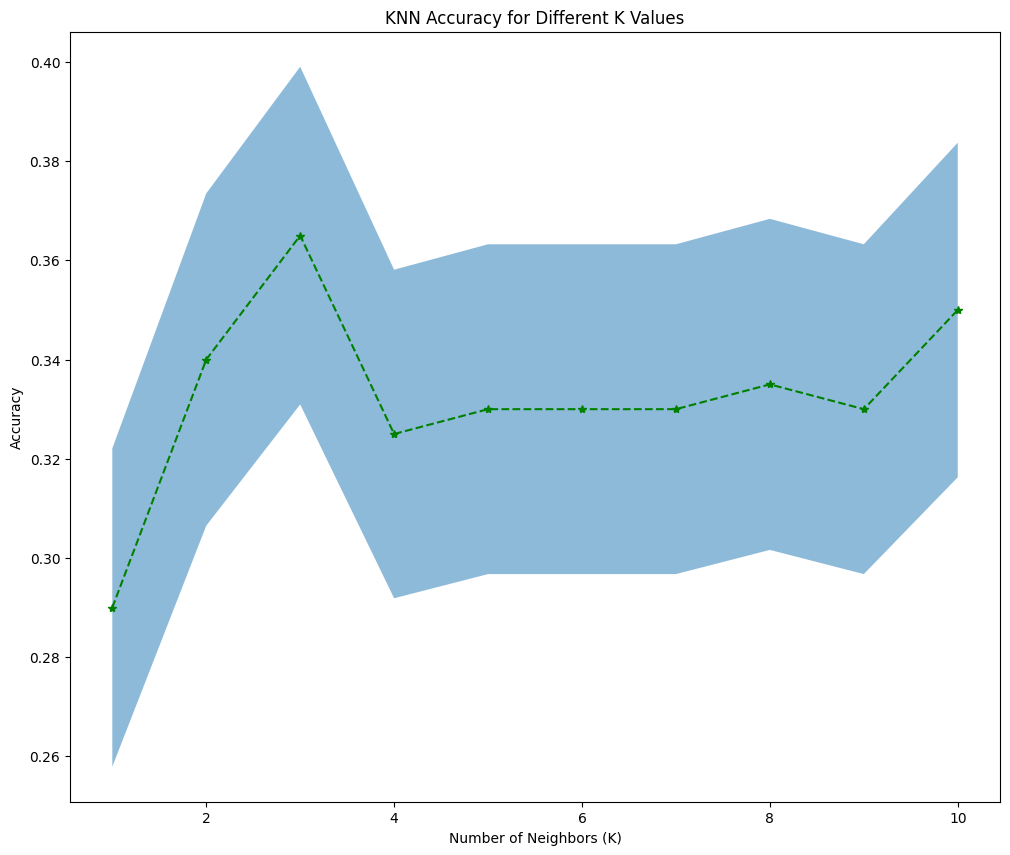

In [47]:
plt.figure(figsize=(12, 10))
plt.plot(range(1, Ks+1), acc, marker='*', ls='--', color='g')
plt.fill_between(range(1, Ks+1), acc-1*std_acc, acc+1*std_acc, alpha=0.5, label='±1 Std Dev')
# plt.legend('Accuracy Curve for different K values', 'Standard Deviatoin')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy for Different K Values')
plt.show()

**Best accuracy and best value of `K`**

In [50]:
print(f'Best accuracy: {acc.max()} \nBest value of k: {acc.argmax()+1}')

Best accuracy: 0.365 
Best value of k: 3


## Let's plot for 100 neighbors

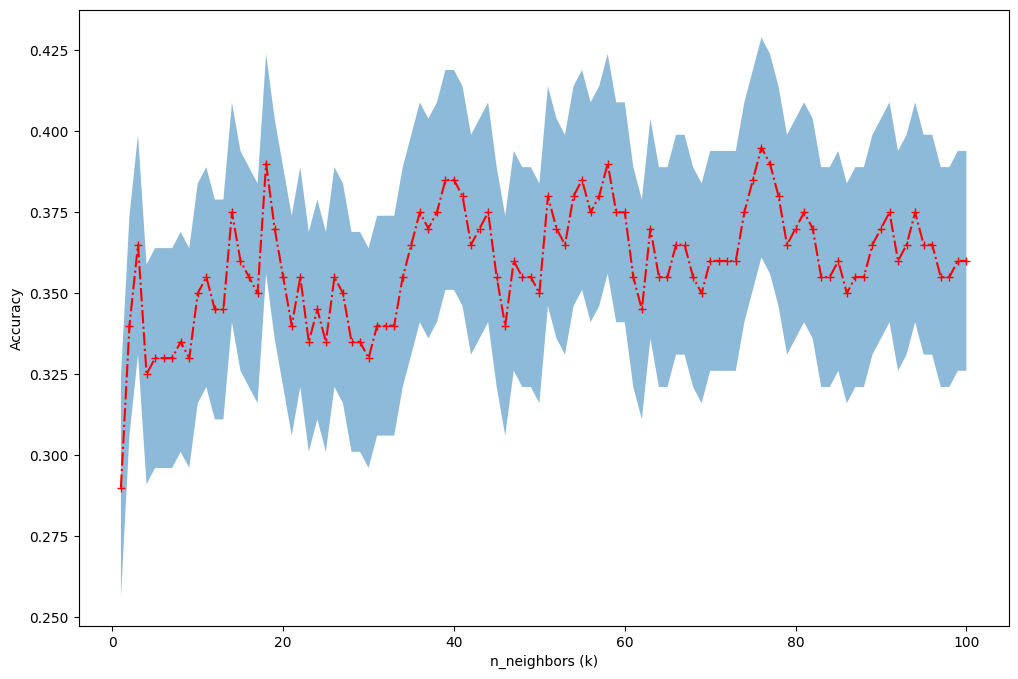

In [61]:
def neighbors_100(K):
    acc_100 = np.zeros((K))
    std_acc_100 = np.zeros((K))
    for m in range(1, K+1):
        model_k = KNeighborsClassifier(n_neighbors=m).fit(X_train, y_train)
        y_pred_k = model_k.predict(X_test)
        acc_100[m-1] = np.round(accuracy_score(y_test, y_pred_k), 3)
        std_acc_100 = np.std(y_pred_k==y_test)/np.sqrt(y_pred_k.shape[0])
    plt.figure(figsize=(12, 8))
    plt.plot(range(1, K+1), acc_100, marker='+', ls='-.', color='red')
    plt.fill_between(range(1, K+1), acc_100-1*std_acc_100, acc_100+1*std_acc_100, label='±1 Std Dev', alpha=0.5)
    plt.xlabel('n_neighbors (k)')
    plt.ylabel('Accuracy')
    plt.show()
neighbors_100(100)
